In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential # type: ignore
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout # type: ignore
from tensorflow.keras.preprocessing.image import ImageDataGenerator # type: ignore

2025-02-05 09:30:43.941505: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-02-05 09:30:43.942928: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-02-05 09:30:43.951058: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-02-05 09:30:43.975810: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1738728044.015143  166658 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1738728044.02

In [2]:
# Paths for dataset
dataset_path = "/home/sandy0810/Documents/Banana_Turmeric_Grading/Dataset"  # Update with your dataset path

In [3]:
# Image settings
img_size = (128, 128)
batch_size = 32

In [4]:
# Data Augmentation & Preprocessing
datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

In [5]:
train_generator = datagen.flow_from_directory(
    dataset_path,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'
)

val_generator = datagen.flow_from_directory(
    dataset_path,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'
)

Found 4059 images belonging to 4 classes.
Found 1013 images belonging to 4 classes.


In [6]:
# Define CNN Model
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(128,128,3)),
    MaxPooling2D(2,2),

    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),

    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(2,2),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(train_generator.num_classes, activation='softmax')  # Output: 4 Classes
])


/home/sandy0810/Documents/Banana_Turmeric_Grading/venv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2025-02-05 09:30:59.708265: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


In [7]:
# Compile model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [8]:
# Train Model
epochs = 10 

In [9]:
# Saving Model history
history = model.fit(train_generator, validation_data=val_generator, epochs=epochs)
# Save model
model.save("banana_turmeric_grading.h5")

/home/sandy0810/Documents/Banana_Turmeric_Grading/venv/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
127/127 ━━━━━━━━━━━━━━━━━━━━ 52s 378ms/step - accuracy: 0.5495 - loss: 0.9950 - val_accuracy: 0.8539 - val_loss: 0.3651
Epoch 2/10
127/127 ━━━━━━━━━━━━━━━━━━━━ 46s 362ms/step - accuracy: 0.8307 - loss: 0.4396 - val_accuracy: 0.8885 - val_loss: 0.3049
Epoch 3/10
127/127 ━━━━━━━━━━━━━━━━━━━━ 46s 361ms/step - accuracy: 0.8696 - loss: 0.3446 - val_accuracy: 0.8934 - val_loss: 0.2592
Epoch 4/10
127/127 ━━━━━━━━━━━━━━━━━━━━ 47s 365ms/step - accuracy: 0.8812 - loss: 0.3078 - val_accuracy: 0.8954 - val_loss: 0.2614
Epoch 5/10
127/127 ━━━━━━━━━━━━━━━━━━━━ 46s 360ms/step - accuracy: 0.8961 - loss: 0.2611 - val_accuracy: 0.9151 - val_loss: 0.2338
Epoch 6/10
127/127 ━━━━━━━━━━━━━━━━━━━━ 48s 374ms/step - accuracy: 0.9122 - loss: 0.2239 - val_accuracy: 0.9141 - val_loss: 0.2149
Epoch 7/10
127/127 ━━━━━━━━━━━━━━━━━━━━ 47s 368ms/step - accuracy: 0.9132 - loss: 0.2324 - val_accuracy: 0.9309 - val_loss: 0.1853
Epoch 8/10
127/127 ━━━━━━━━━━━━━━━━━━━━ 46s 363ms/step - accuracy: 0.9428 - loss: 0

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 231ms/step
Prediction: Banana - Grade B (Accuracy: 99.99%)


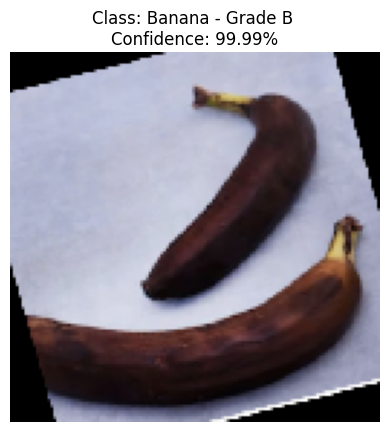

In [11]:
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.preprocessing.image import load_img, img_to_array

# Load trained model
model = tf.keras.models.load_model("banana_turmeric_grading.h5")

# Class Labels (Banana A, Banana B, Turmeric A, Turmeric B)
class_labels = list(train_generator.class_indices.keys())

# Function to predict the image with grading
def predict_image(image_path):
    img = load_img(image_path, target_size=(128, 128))  # Load and resize image
    img_array = img_to_array(img) / 255.0  # Normalize
    img_array = np.expand_dims(img_array, axis=0)  # Expand dims for model

    prediction = model.predict(img_array)  # Predict
    predicted_class = np.argmax(prediction)  # Get class index
    confidence = np.max(prediction) * 100  # Get confidence %

    # Extract main class (Banana/Turmeric) & Grade (Class A/B)
    full_class_name = class_labels[predicted_class]
    category, grade = full_class_name.split("_")  # Split name (Banana_A -> Banana, A)

    print(f"Prediction: {category} - Grade {grade} (Accuracy: {confidence:.2f}%)")

    # Show image
    plt.imshow(img)
    plt.axis("off")
    plt.title(f"Class: {category} - Grade {grade} \nConfidence: {confidence:.2f}%")
    plt.show()

# Example Usage
predict_image("test2.png")  # Change to your image path


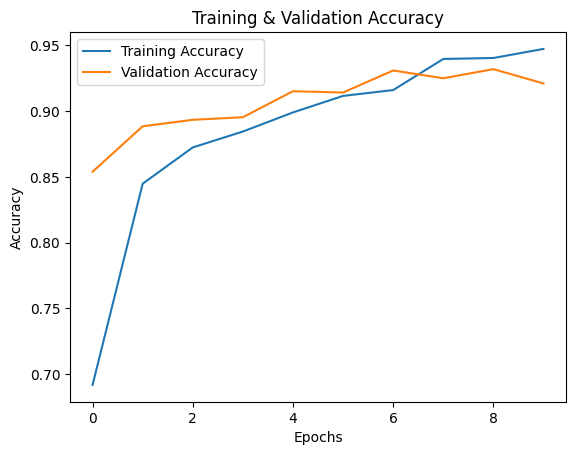

In [18]:
import matplotlib.pyplot as plt

# Plot Accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training & Validation Accuracy')
plt.savefig('results/Training_Validation_Accuracy.png')
plt.show()



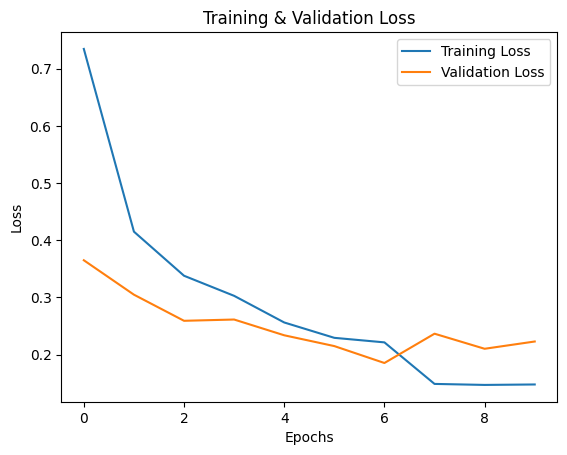

In [19]:
# Plot Loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training & Validation Loss')
plt.savefig('results/Training_Validation_Loss.png')
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 173ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 167ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 175ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 174ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 157ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 161ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 189ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 160ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 193ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 186ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 179ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 175ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 173ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 177ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 163ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 193ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 168ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 186ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 155ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 162ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 153ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 158ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 178ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 154ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 158ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 

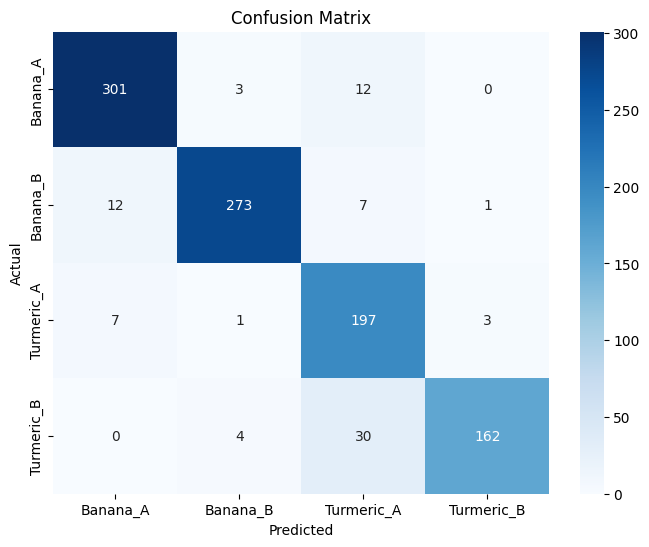

In [22]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import numpy as np

# Get predictions
y_true = []
y_pred = []

for i in range(len(val_generator)):
    images, labels = val_generator[i]
    preds = model.predict(images)
    
    y_true.extend(np.argmax(labels, axis=1))
    y_pred.extend(np.argmax(preds, axis=1))

# Compute confusion matrix
cm = confusion_matrix(y_true, y_pred)
class_names = list(train_generator.class_indices.keys())

# Plot Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.savefig('results/Confusion_Matrix.png')
plt.show()



In [37]:
# Print Classification Report
report = classification_report(y_true, y_pred, target_names=class_names)



In [38]:
print("Classification Report:\n", report)

Classification Report:
               precision    recall  f1-score   support

    Banana_A       0.94      0.95      0.95       316
    Banana_B       0.97      0.93      0.95       293
  Turmeric_A       0.80      0.95      0.87       208
  Turmeric_B       0.98      0.83      0.90       196

    accuracy                           0.92      1013
   macro avg       0.92      0.91      0.92      1013
weighted avg       0.93      0.92      0.92      1013

